## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.249301 -0.978345  1.494095 -1.325903  1.045283 -0.704800
1  0.370736  0.467286 -1.208309 -0.262673 -0.646414  0.584630
2 -1.110803 -0.360356 -0.539766 -0.785128  1.205520 -0.890047
3 -1.047360  1.310830  1.226462 -0.760924 -1.127980 -0.500034
4  0.535950  1.570940  0.932148  1.099609  1.479639  1.810140


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0037845	total: 55.6ms	remaining: 55.6s
1:	learn: 0.9931017	total: 56.2ms	remaining: 28s
2:	learn: 0.9806922	total: 56.7ms	remaining: 18.8s
3:	learn: 0.9686781	total: 57.3ms	remaining: 14.3s
4:	learn: 0.9567667	total: 57.8ms	remaining: 11.5s
5:	learn: 0.9455530	total: 58.2ms	remaining: 9.65s
6:	learn: 0.9331379	total: 58.7ms	remaining: 8.32s
7:	learn: 0.9239745	total: 59.2ms	remaining: 7.34s
8:	learn: 0.9140452	total: 59.7ms	remaining: 6.58s
9:	learn: 0.9019765	total: 60.2ms	remaining: 5.96s
10:	learn: 0.8915202	total: 60.7ms	remaining: 5.45s
11:	learn: 0.8812220	total: 61.1ms	remaining: 5.03s
12:	learn: 0.8713578	total: 61.6ms	remaining: 4.67s
13:	learn: 0.8605958	total: 62.1ms	remaining: 4.37s
14:	learn: 0.8516521	total: 62.6ms	remaining: 4.11s
15:	learn: 0.8423149	total: 63.1ms	remaining: 3.88s
16:	learn: 0.8326964	total: 63.6ms	remaining: 3.68s
17:	learn: 0.8233720	total: 64ms	remaining: 3.49s
18:	learn: 0.8148118	total: 64.4ms	remaining: 3.

101:	learn: 0.3596563	total: 109ms	remaining: 958ms
102:	learn: 0.3569270	total: 109ms	remaining: 952ms
103:	learn: 0.3541311	total: 110ms	remaining: 946ms
104:	learn: 0.3513470	total: 110ms	remaining: 939ms
105:	learn: 0.3486744	total: 111ms	remaining: 933ms
106:	learn: 0.3457069	total: 111ms	remaining: 927ms
107:	learn: 0.3428963	total: 112ms	remaining: 921ms
108:	learn: 0.3398848	total: 112ms	remaining: 915ms
109:	learn: 0.3365223	total: 112ms	remaining: 909ms
110:	learn: 0.3336870	total: 113ms	remaining: 903ms
111:	learn: 0.3310258	total: 113ms	remaining: 898ms
112:	learn: 0.3284391	total: 114ms	remaining: 893ms
113:	learn: 0.3257022	total: 114ms	remaining: 887ms
114:	learn: 0.3229801	total: 115ms	remaining: 882ms
115:	learn: 0.3199844	total: 115ms	remaining: 876ms
116:	learn: 0.3175116	total: 115ms	remaining: 871ms
117:	learn: 0.3153127	total: 116ms	remaining: 866ms
118:	learn: 0.3127343	total: 116ms	remaining: 862ms
119:	learn: 0.3103803	total: 117ms	remaining: 857ms
120:	learn: 

263:	learn: 0.1182397	total: 186ms	remaining: 520ms
264:	learn: 0.1175707	total: 187ms	remaining: 519ms
265:	learn: 0.1170414	total: 187ms	remaining: 517ms
266:	learn: 0.1162669	total: 188ms	remaining: 515ms
267:	learn: 0.1158707	total: 188ms	remaining: 514ms
268:	learn: 0.1153851	total: 188ms	remaining: 512ms
269:	learn: 0.1145818	total: 189ms	remaining: 511ms
270:	learn: 0.1140078	total: 189ms	remaining: 509ms
271:	learn: 0.1132085	total: 190ms	remaining: 508ms
272:	learn: 0.1129639	total: 191ms	remaining: 508ms
273:	learn: 0.1127146	total: 191ms	remaining: 507ms
274:	learn: 0.1124152	total: 192ms	remaining: 506ms
275:	learn: 0.1121552	total: 192ms	remaining: 505ms
276:	learn: 0.1113849	total: 193ms	remaining: 503ms
277:	learn: 0.1111120	total: 193ms	remaining: 502ms
278:	learn: 0.1102317	total: 194ms	remaining: 501ms
279:	learn: 0.1100230	total: 194ms	remaining: 499ms
280:	learn: 0.1092680	total: 195ms	remaining: 498ms
281:	learn: 0.1086300	total: 195ms	remaining: 496ms
282:	learn: 

482:	learn: 0.0402808	total: 292ms	remaining: 313ms
483:	learn: 0.0400324	total: 293ms	remaining: 312ms
484:	learn: 0.0397340	total: 293ms	remaining: 311ms
485:	learn: 0.0395525	total: 294ms	remaining: 311ms
486:	learn: 0.0394795	total: 295ms	remaining: 310ms
487:	learn: 0.0392629	total: 295ms	remaining: 310ms
488:	learn: 0.0390295	total: 295ms	remaining: 309ms
489:	learn: 0.0388549	total: 296ms	remaining: 308ms
490:	learn: 0.0387144	total: 296ms	remaining: 307ms
491:	learn: 0.0384864	total: 297ms	remaining: 306ms
492:	learn: 0.0382789	total: 297ms	remaining: 306ms
493:	learn: 0.0380815	total: 298ms	remaining: 305ms
494:	learn: 0.0378625	total: 298ms	remaining: 304ms
495:	learn: 0.0376339	total: 299ms	remaining: 304ms
496:	learn: 0.0373512	total: 299ms	remaining: 303ms
497:	learn: 0.0371289	total: 300ms	remaining: 303ms
498:	learn: 0.0370187	total: 301ms	remaining: 302ms
499:	learn: 0.0368874	total: 302ms	remaining: 302ms
500:	learn: 0.0366922	total: 302ms	remaining: 301ms
501:	learn: 

646:	learn: 0.0167135	total: 370ms	remaining: 202ms
647:	learn: 0.0166064	total: 370ms	remaining: 201ms
648:	learn: 0.0165192	total: 371ms	remaining: 201ms
649:	learn: 0.0164742	total: 371ms	remaining: 200ms
650:	learn: 0.0164020	total: 372ms	remaining: 199ms
651:	learn: 0.0163154	total: 372ms	remaining: 199ms
652:	learn: 0.0162477	total: 372ms	remaining: 198ms
653:	learn: 0.0161854	total: 373ms	remaining: 197ms
654:	learn: 0.0160876	total: 373ms	remaining: 197ms
655:	learn: 0.0160214	total: 374ms	remaining: 196ms
656:	learn: 0.0159623	total: 374ms	remaining: 195ms
657:	learn: 0.0158974	total: 375ms	remaining: 195ms
658:	learn: 0.0158032	total: 376ms	remaining: 194ms
659:	learn: 0.0157413	total: 376ms	remaining: 194ms
660:	learn: 0.0156796	total: 376ms	remaining: 193ms
661:	learn: 0.0156269	total: 377ms	remaining: 192ms
662:	learn: 0.0155757	total: 377ms	remaining: 192ms
663:	learn: 0.0155260	total: 378ms	remaining: 191ms
664:	learn: 0.0154690	total: 378ms	remaining: 191ms
665:	learn: 

873:	learn: 0.0071833	total: 476ms	remaining: 68.6ms
874:	learn: 0.0071673	total: 477ms	remaining: 68.1ms
875:	learn: 0.0071513	total: 477ms	remaining: 67.5ms
876:	learn: 0.0071244	total: 478ms	remaining: 67ms
877:	learn: 0.0071089	total: 478ms	remaining: 66.4ms
878:	learn: 0.0070825	total: 478ms	remaining: 65.8ms
879:	learn: 0.0070681	total: 479ms	remaining: 65.3ms
880:	learn: 0.0070434	total: 479ms	remaining: 64.7ms
881:	learn: 0.0070221	total: 480ms	remaining: 64.2ms
882:	learn: 0.0069978	total: 480ms	remaining: 63.6ms
883:	learn: 0.0069704	total: 481ms	remaining: 63.1ms
884:	learn: 0.0069365	total: 481ms	remaining: 62.5ms
885:	learn: 0.0069026	total: 482ms	remaining: 62ms
886:	learn: 0.0068794	total: 482ms	remaining: 61.4ms
887:	learn: 0.0068468	total: 483ms	remaining: 60.9ms
888:	learn: 0.0068241	total: 483ms	remaining: 60.3ms
889:	learn: 0.0067917	total: 484ms	remaining: 59.8ms
890:	learn: 0.0067617	total: 484ms	remaining: 59.2ms
891:	learn: 0.0067305	total: 485ms	remaining: 58.7

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

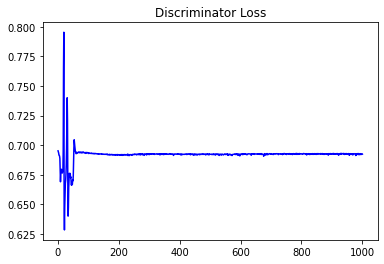

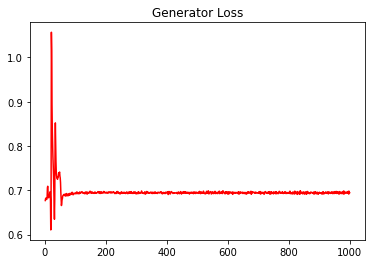

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.11488514892461267


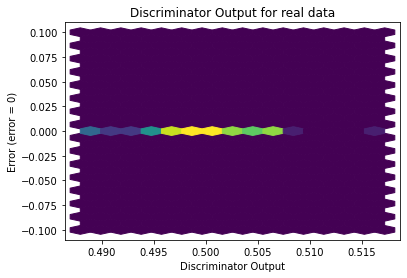

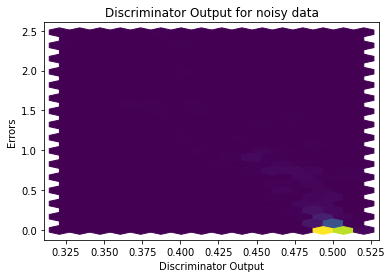

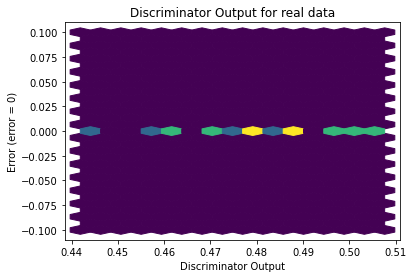

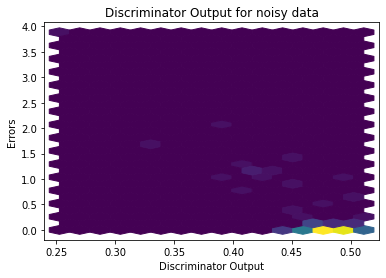

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


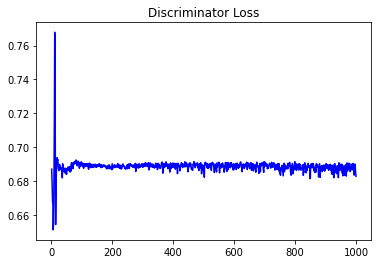

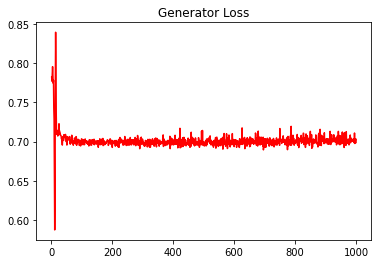

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.07090764953093227


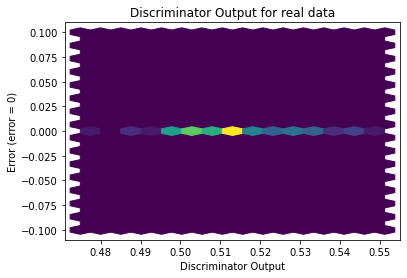

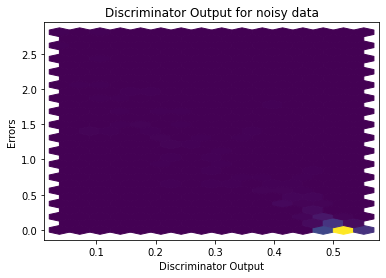

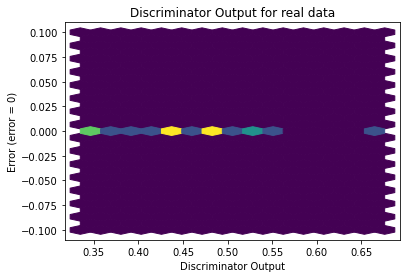

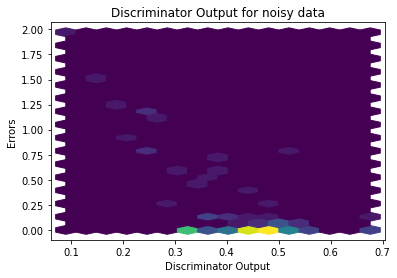

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2641]], requires_grad=True)
